In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import yfinance as yf
from pandas_datareader import data as pdr

In [2]:
# yf.pdr_override()

def get_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data



In [3]:
data = get_data('AAPL', '2010-01-01', '2024-01-01')
data1 = get_data('GOOG', '2010-01-01', '2024-01-01')
# data = pd.concat(data1, axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# For time stamps
from datetime import datetime
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-03,174.240005,176.820007,173.350006,176.649994,175.750671,79763700,APPLE
2023-11-06,176.380005,179.429993,176.210007,179.229996,178.317520,63841300,APPLE
2023-11-07,179.179993,182.440002,178.970001,181.820007,180.894363,70530000,APPLE
2023-11-08,182.350006,183.449997,181.589996,182.889999,181.958893,49340300,APPLE
2023-11-09,182.960007,184.119995,181.809998,182.410004,181.481354,53763500,APPLE
...,...,...,...,...,...,...,...
2024-10-28,189.570007,190.210007,188.210007,188.389999,188.389999,27930800,AMAZON
2024-10-29,188.580002,191.460007,187.820007,190.830002,190.830002,35690200,AMAZON
2024-10-30,194.699997,195.610001,192.419998,192.729996,192.729996,37707600,AMAZON


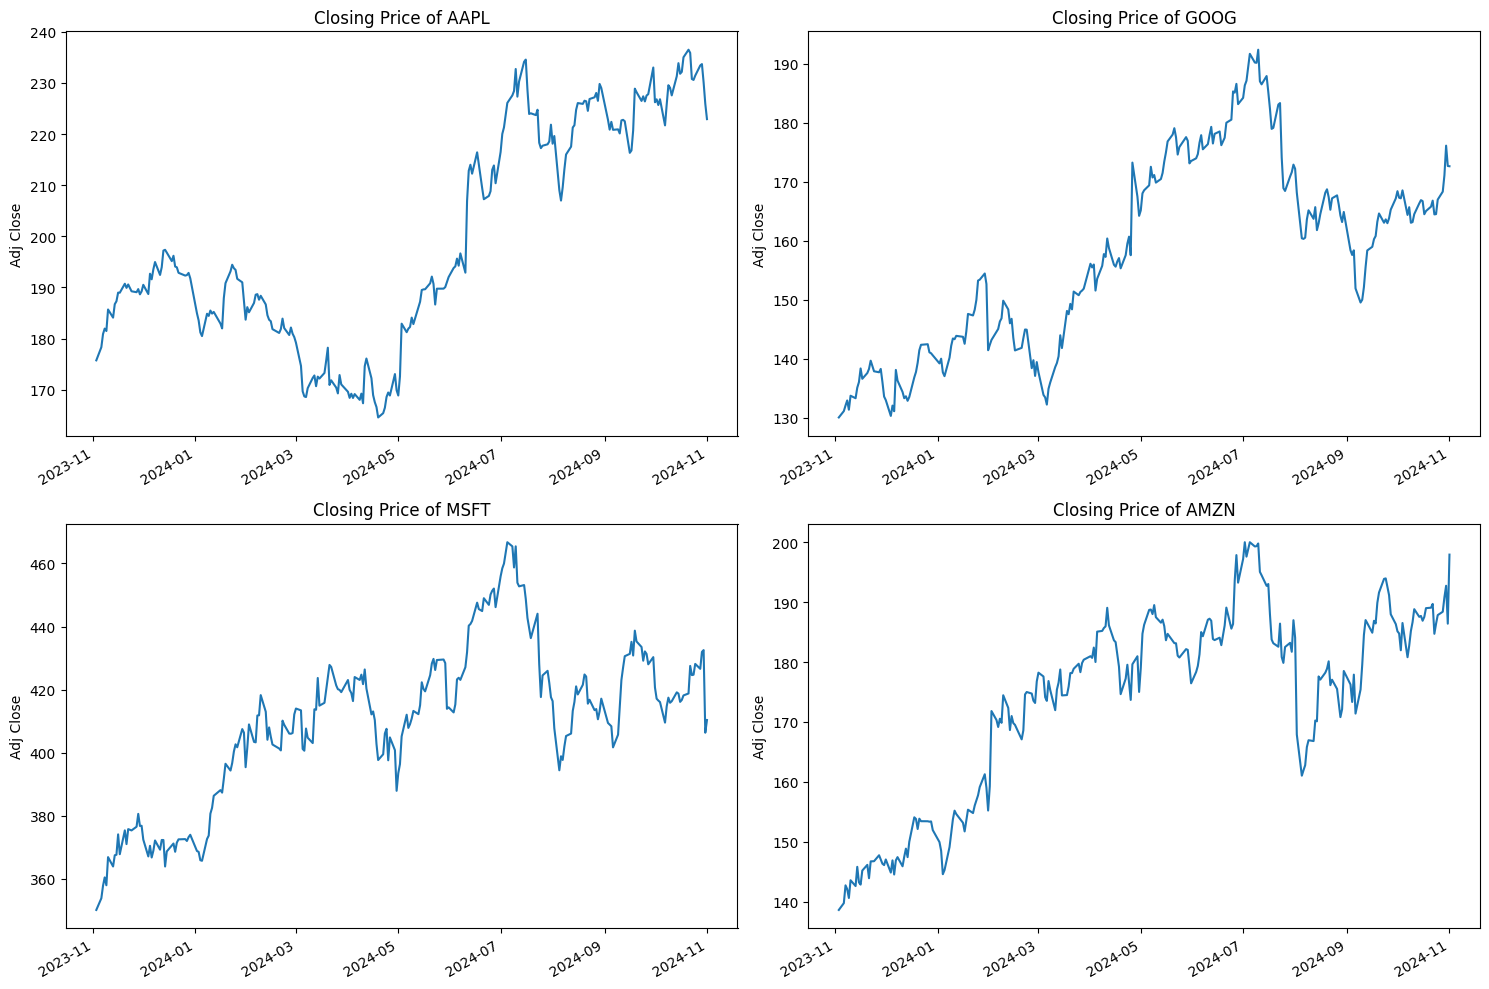

In [6]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

In [7]:
new_df = pd.DataFrame(df, columns=['Open', 'High', 'Low', 'Close'])
sc1 = MinMaxScaler()
sc2 = MinMaxScaler()

x = new_df[['Open', 'High', 'Low']]
y = new_df['Close']

x = sc1.fit_transform(x)
y = sc2.fit_transform(y.values.reshape(-1, 1))


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

model.score(x_test, y_test)

0.9998478274800722

In [9]:
type(y_test)

numpy.ndarray

In [10]:
for i in range(0, 5):
    print(f"Predicted price: {y_pred[i]} Actual price: {y_test[i]}")

Predicted price: [0.14465903] Actual price: [0.14517041]
Predicted price: [0.86517446] Actual price: [0.85266469]
Predicted price: [0.04053398] Actual price: [0.04113411]
Predicted price: [0.07631683] Actual price: [0.07642577]
Predicted price: [0.82097851] Actual price: [0.82778254]


In [11]:
y_pred = sc2.inverse_transform(y_pred.reshape(-1, 1))
y_test = sc2.inverse_transform(np.array(y_test).reshape(-1, 1))
y_train = sc2.inverse_transform(np.array(y_train).reshape(-1, 1))

In [12]:
for i in range(0, 5):
    print(f"Predicted price: {y_pred[i]} Actual price: {y_test[i]}")

Predicted price: [179.14757483] Actual price: [179.32000732]
Predicted price: [422.0981738] Actual price: [417.88000488]
Predicted price: [144.03764667] Actual price: [144.24000549]
Predicted price: [156.10326766] Actual price: [156.13999939]
Predicted price: [407.19574065] Actual price: [409.48999023]


In [13]:
model

LinearRegression()

In [15]:
# Load new data (example new data, make sure it's in the right format)
# Replace this with your actual new data
new_data = [[176.750, 179.08, 176.51]]  # Example new data, shape must match training data

# If you scaled your data during training, make sure to scale the new data too
new_data_scaled = sc1.transform(new_data)

# Make predictions on the new data
prediction = model.predict(new_data_scaled)

# If classification, you may get the predicted class:
predicted_class = prediction[0]
print(f'Predicted class: {predicted_class}')

Predicted class: [0.14272603]


c:\Users\Miral\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [16]:
predicted_class = sc2.inverse_transform(predicted_class.reshape(-1, 1))
print(f'Predicted class: {predicted_class}')

Predicted class: [[178.4957843]]


In [17]:
new_df

,Open,High,Low,Close
Date,,,,
2023-11-03,174.240005,176.820007,173.350006,176.649994
2023-11-06,176.380005,179.429993,176.210007,179.229996
2023-11-07,179.179993,182.440002,178.970001,181.820007
2023-11-08,182.350006,183.449997,181.589996,182.889999
2023-11-09,182.960007,184.119995,181.809998,182.410004
...,...,...,...,...
2024-10-28,189.570007,190.210007,188.210007,188.389999
2024-10-29,188.580002,191.460007,187.820007,190.830002
2024-10-30,194.699997,195.610001,192.419998,192.729996


In [18]:
import joblib

# Save the scaler
joblib.dump(sc1, 'scaler1.pkl')
joblib.dump(sc2, 'scaler2.pkl')

# Save the model
joblib.dump(model, 'model.pkl')

['model.pkl']

In [19]:
# Existing code to load historical data (make sure this is before the new cell)
data = get_data('AAPL', '2010-01-01', '2024-01-01')  # Example for AAPL

# Ensure you have a 'Date' column
data.reset_index(inplace=True)  # Reset index to have 'Date' as a column

# Prepare data for trend line
closing_prices = data['Close'].values  # Get closing prices
dates = np.arange(len(closing_prices))  # Create a numerical representation of dates

# Calculate slope and intercept for the trend line
slope, intercept = np.polyfit(dates, closing_prices, 1)
trend_line = slope * dates + intercept  # Generate trend line values

# Create a DataFrame for the trend line
trend_df = pd.DataFrame({
    'Date': data['Date'],
    'Trend Line': trend_line
})

# Save trend line data to a CSV file
trend_df.to_csv('trend_line_data.csv', index=False)


[*********************100%***********************]  1 of 1 completed


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculating R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 0.8907144844688591
Mean Squared Error (MSE): 1.5988938048813883
R² Score: 0.9998478274800722


In [30]:
import numpy as np
import pandas as pd
from scipy import stats

def get_confidence_intervals(model, x, y, alpha=0.05):
    """Calculates confidence intervals for predictions."""
    # Get predictions
    y_pred = model.predict(x)

    # Calculate residuals
    residuals = y - y_pred
    
    # Calculate standard error of the regression
    se = np.std(residuals)
    
    # Get critical t-value for the confidence level
    n = len(y)  # number of observations
    t_value = stats.t.ppf(1 - alpha / 2, n - 1)  # two-tailed

    # Calculate the margin of error
    margin_of_error = t_value * se

    # Ensure y_pred, margin_of_error are numpy arrays
    y_pred = np.array(y_pred).flatten()  # Flatten to ensure it's 1D
    margin_of_error = np.array(margin_of_error).flatten()  # Flatten to ensure it's 1D

    # Create a DataFrame to hold the predictions and confidence intervals
    conf_intervals = pd.DataFrame({
        'Predicted': y_pred,
        'Lower CI': y_pred - margin_of_error,
        'Upper CI': y_pred + margin_of_error
    })

    return conf_intervals

# Get confidence intervals
confidence_intervals = get_confidence_intervals(model, x_test, y_test)

# Display confidence intervals
print(confidence_intervals.head())


   Predicted    Lower CI    Upper CI
0   0.144659 -201.383484  201.672802
1   0.865174 -200.662969  202.393318
2   0.040534 -201.487609  201.568677
3   0.076317 -201.451826  201.604460
4   0.820979 -200.707165  202.349122


In [34]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download stock data
stock_symbol = 'AAPL'  # Example: Apple Inc.
data = yf.download(stock_symbol, start='2020-01-01', end='2023-01-01')

# Add a rolling average feature
data['Rolling_Avg'] = data['Close'].rolling(window=5).mean()  # 5-day rolling average

# Drop NaN values generated by rolling average
data.dropna(inplace=True)

# Define features and target
X = data[['Rolling_Avg']]  # Use rolling average as feature
y = data['Close']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


[*********************100%***********************]  1 of 1 completed

Mean Absolute Error: 2.108144945910275
Mean Squared Error: 7.608319827391954
R² Score: 0.9920512131516137
